In [1]:
# ! pip install tensorflow
# ! pip install matplotlib
# ! pip install opencv-python
# ! pip install scikit-learn

In [2]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import random

In [3]:
# The MNIST dataset is a collection of 70 000 grayscale images 
# of handwritten digits each with a size of 28x28 pixels.

# load the dataset from the npz file
with np.load('mnist.npz') as data:
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['x_test']
    y_test = data['y_test']

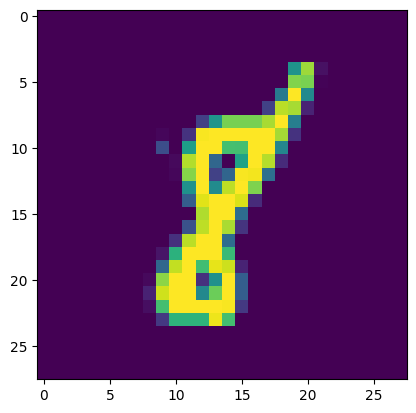

In [4]:
# Display a random image from X_train
rdm_index = random.randint(0, len(X_train))
rdm_image = X_train[rdm_index]

plt.imshow(rdm_image)

In [5]:
print(f"X_train.shape -> {X_train.shape}")
print(f"X_test.shape -> {X_test.shape}")
print(f"y_train.shape -> {y_train.shape}")
print(f"y_test.shape -> {y_test.shape}")

X_train.shape -> (60000, 28, 28)
X_test.shape -> (10000, 28, 28)
y_train.shape -> (60000,)
y_test.shape -> (10000,)


In [6]:
############  pre-processing  ############

In [7]:
# Reshape from 28 x 28 pixels to 784 features
# then divide by 255 to normalize the pixel values (0, 255) between 0 and 1

print(f"Nos images ont pour shape {rdm_image.shape}")

X_train = X_train.reshape(60000, 784) / 255.0
X_test = X_test.reshape(10000, 784) / 255.0

print(f"Et on veut les passer en {X_train[0].shape}")

Nos images ont pour shape (28, 28)
Et on veut les passer en (784,)


In [8]:
# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
####### modèle #######

In [10]:
# Set the input shape ( we need it to match the number of neurons in the input layer )
input_shape = (784,)

# Get the unique values in y_train ( we need it to match the number of neurons in the output layer )
unique_values = np.unique(y_train)
unique_y = len(unique_values)
unique_y

10

In [11]:
# Convert target classes to categorical ones
y_train = tf.keras.utils.to_categorical(y_train, unique_y)
y_test = tf.keras.utils.to_categorical(y_test, unique_y)

In [12]:
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create the model
model = Sequential()
model.add(Dense(240, input_shape=input_shape, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(unique_y, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=12, batch_size=256, verbose=0, validation_data=(X_val, y_val))

# 8.0s

In [14]:
# Test the model after training
test_results = model.evaluate(X_test, y_test, verbose=1)

# best so far?   loss: 0.0678 - accuracy: 0.9796

313/313 [==============================] - 0s 830us/step - loss: 0.0678 - accuracy: 0.9796


In [15]:
# The loss is a measure of how well the model is able to predict the correct class for each input . 
# It is calculated as the difference between the predicted class probabilities and the true class probabilities, 
# averaged over all inputs in the test set. A lower loss value indicates better performance.

# The accuracy is the proportion of correctly classified inputs in the test set. 
# It is calculated as the number of correctly classified inputs divided by the total number of inputs 
# in the test set. A higher accuracy value indicates better performance.

In [16]:
############  tests  ############

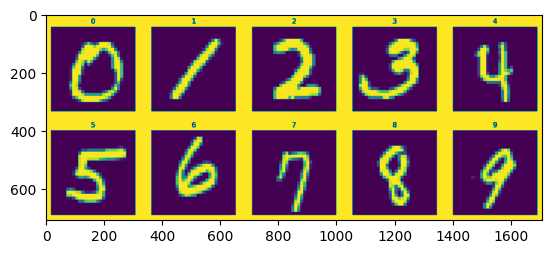

In [17]:
import cv2

# Load the image in grayscale
img = cv2.imread('mnist.png', cv2.IMREAD_GRAYSCALE)

# Invert the colors
# img = cv2.bitwise_not(img)

plt.imshow(img)

(280, 280)


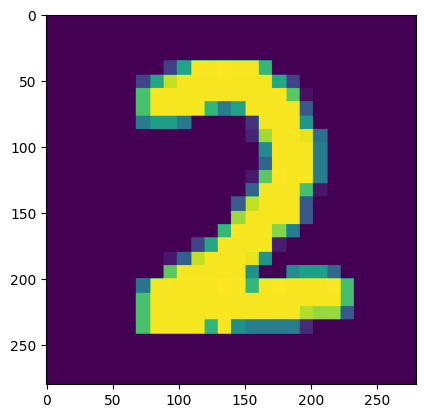

In [18]:
deux = img[50:330,715:995]
print(deux.shape)
plt.imshow(deux)

(280, 280)


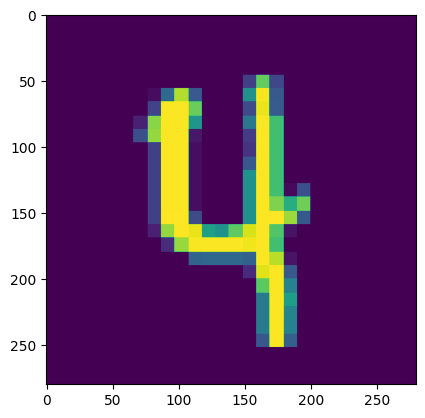

In [19]:
quatre = img[50:330,1409:-20]
print(quatre.shape)
plt.imshow(quatre)

(280, 280)


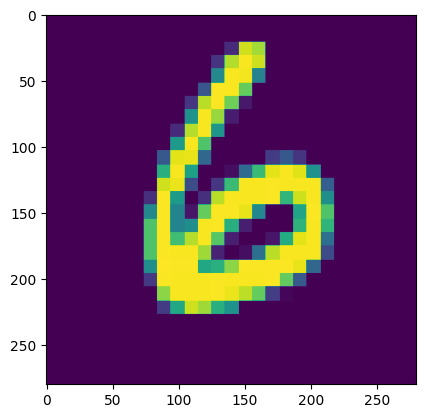

In [20]:
six = img[400:680,373:653]
print(six.shape)
plt.imshow(six)

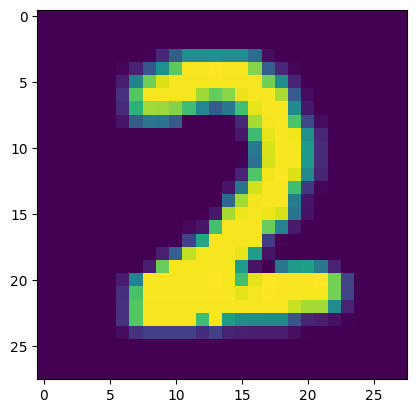

In [21]:
# Need to make sure the images are in the same configuration as during training

# Convert the images to float32 data type
deux = deux.astype('float32')

# Resize the images to 28x28 pixels using bilinear interpolation
deux = cv2.resize(deux, (28, 28), interpolation=cv2.INTER_AREA)

plt.imshow(deux)

# Reshape the images to a 1D array of length 784
deux = deux.reshape(1, -1)

# Normalize the pixel values to be between 0 and 1
deux = deux / 255.0

# Reshape the images back to a 2D array of shape (1, 784)
deux = deux.reshape(1, 784)

In [22]:
# prediction from model based on the image 2
prediction2 = model.predict(deux)

# model.predict() returns a 2D np.array, here, shape (1, 10),
# Each value represents the probability predicted by the model for each class
print(prediction2)

1/1 [==============================] - 0s 55ms/step
[[6.9945778e-11 1.2654118e-07 9.9966431e-01 3.3555157e-04 4.4417213e-17
  3.8965157e-11 5.7826506e-14 9.2731973e-09 1.7484986e-08 3.1657275e-13]]


In [23]:
# The index of the element in the 2D array returned by `model.predict()` corresponds to 
# the index of the class label in the list of class labels used to train the model. 

# In the case of the MNIST dataset, the class labels are the integers from 0 to 9, 
# and the order of the class labels is the same as the order of the units in the output layer of the model. 

In [24]:
# Get the predicted label
predicted_label2 = np.argmax(prediction2)

# Print the predicted label
print("Using image 2 our model predicts the label = ", predicted_label2)

Using image 2 our model predicts the label =  2


In [25]:
# function to automate the preprocessing of new images and predictions for testing

def predict_digit(digits, model):
    # Convert to float32 and resize
    digits = digits.astype('float32')
    digits = cv2.resize(digits, (28, 28), interpolation=cv2.INTER_AREA)
    
    # Preprocess the image
    digits = digits.reshape(1, -1)
    digits = digits/ 255.0
    digits = digits.reshape(1, 784)
    
    # Make the prediction
    prediction = model.predict(digits)
    predicted_label = np.argmax(prediction)
    
    return predicted_label

In [26]:
# prediction from model based on the image 4
print(f"Using image 4 our model predicts the label = {predict_digit(quatre, model)}")

1/1 [==============================] - 0s 15ms/step
Using image 4 our model predicts the label = 4


In [27]:
# prediction from model based on the image 6
print(f"Using image 6 our model predicts the label = {predict_digit(six, model)}")

1/1 [==============================] - 0s 14ms/step
Using image 6 our model predicts the label = 6


In [28]:
##### mine #####

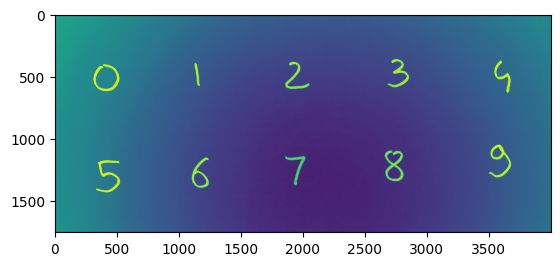

In [29]:
# Load the image in grayscale
mine = cv2.imread('mine.jpg', cv2.IMREAD_GRAYSCALE)

# Invert the colors
mine = cv2.bitwise_not(mine)

plt.imshow(mine)

(360, 360)


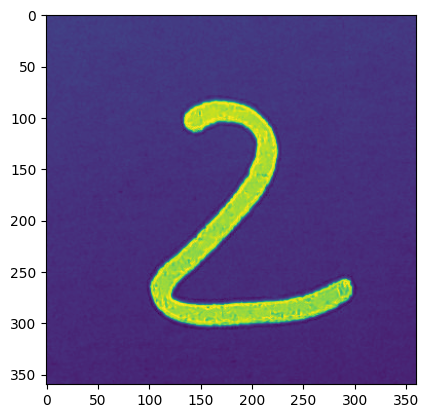

In [30]:
deux = mine[300:660,1750:2110]
print(deux.shape)
plt.imshow(deux)

(400, 400)


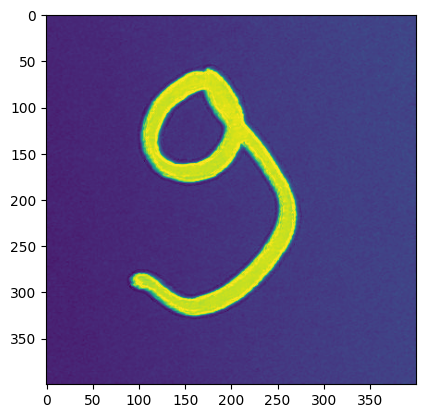

In [31]:
neuf = mine[990:1390,3400:3800]
print(neuf.shape)
plt.imshow(neuf)

(360, 360)


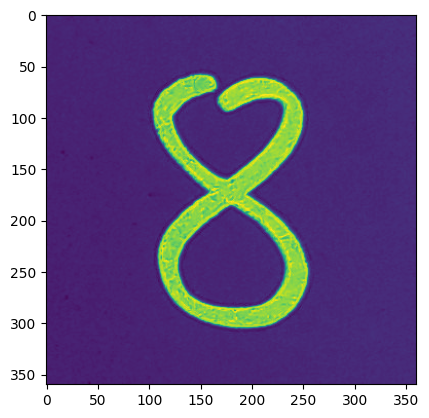

In [32]:
huit = mine[1040:1400,2550:2910]
print(huit.shape)
plt.imshow(huit)

In [33]:
print(f"Using image 2 our model predicts the label = {predict_digit(deux, model)}")

1/1 [==============================] - 0s 15ms/step
Using image 2 our model predicts the label = 2


In [34]:
print(f"Using image 9 our model predicts the label = {predict_digit(neuf, model)}")

1/1 [==============================] - 0s 16ms/step
Using image 9 our model predicts the label = 3


In [35]:
print(f"Using image 8 our model predicts the label = {predict_digit(huit, model)}")

1/1 [==============================] - 0s 14ms/step
Using image 8 our model predicts the label = 8
